In [1]:
!nvidia-smi

Thu Mar  9 15:47:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
from getpass import getpass

user = getpass("Github User:")
password = getpass("Github Password:")
os.environ['GITHUB_AUTH'] = user + ':' + password

Github User:··········
Github Password:··········


In [4]:
REPO_DIR = '/demo'
%mkdir -p "$REPO_DIR"
%cd "$REPO_DIR" 
!git clone https://$GITHUB_AUTH@github.com/srijarkoroy/LinkSeg 
%cd "$REPO_DIR/LinkSeg"

/demo
Cloning into 'LinkSeg'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 116 (delta 51), reused 84 (delta 23), pack-reused 0
Receiving objects: 100% (116/116), 654.19 KiB | 17.68 MiB/s, done.
Resolving deltas: 100% (51/51), done.
/demo/LinkSeg


In [5]:
!unzip /content/drive/MyDrive/datasets.zip -d /demo/LinkSeg

Archive:  /content/drive/MyDrive/datasets.zip
mapname:  conversion of  failed
 extracting: /demo/LinkSeg/test.zip  
 extracting: /demo/LinkSeg/training.zip  


In [6]:
%mkdir dataset/

In [7]:
!unzip /demo/LinkSeg/test.zip -d /demo/LinkSeg/dataset/

Archive:  /demo/LinkSeg/test.zip
   creating: /demo/LinkSeg/dataset/test/
   creating: /demo/LinkSeg/dataset/test/images/
  inflating: /demo/LinkSeg/dataset/test/images/01_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/02_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/03_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/04_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/05_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/06_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/07_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/08_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/09_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/10_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/11_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/12_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/13_test.tif  
  inflating: /demo/LinkSeg/dataset/test/images/14_test.tif  
  inflating: /demo/LinkS

In [8]:
!unzip /demo/LinkSeg/training.zip -d /demo/LinkSeg/dataset/

Archive:  /demo/LinkSeg/training.zip
   creating: /demo/LinkSeg/dataset/training/
   creating: /demo/LinkSeg/dataset/training/1st_manual/
 extracting: /demo/LinkSeg/dataset/training/1st_manual/21_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/22_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/23_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/24_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/25_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/26_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/27_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/28_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/29_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/30_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/31_manual1.gif  
 extracting: /demo/LinkSeg/dataset/training/1st_manual/32_manual1.gif 

In [9]:
data_path = "/demo/LinkSeg/dataset"
print(data_path)

/demo/LinkSeg/dataset


In [10]:
!cat data/augment.py

import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm

import imageio
from albumentations import HorizontalFlip, VerticalFlip, Rotate


def create_dir(path):

    ### Create a directory
    if not os.path.exists(path):
        os.makedirs(path)

def load_data(path):

    ### Split data into train and test set
    train_x = sorted(glob(os.path.join(path, "training", "images", "*.tif")))
    train_y = sorted(glob(os.path.join(path, "training", "1st_manual", "*.gif")))

    test_x = sorted(glob(os.path.join(path, "test", "images", "*.tif")))
    test_y = sorted(glob(os.path.join(path, "test", "mask", "*.gif")))

    return (train_x, train_y), (test_x, test_y)

def augment_data(images, masks, save_path, augment=True):

    ### Augmenting data into Horizontal,Vertical & Rotate

    size = (512, 512)

    for idx, (x, y) in tqdm(enumerate(zip(images, masks)), total=len(images)):
        """ Extracting the name """
        name = x.split("/")[-1].split(".")[0]

 

In [11]:
from data.augment import load_data
(train_x, train_y), (test_x, test_y) = load_data(data_path)

In [12]:
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Test: {len(test_x)} - {len(test_y)}")

Train: 20 - 20
Test: 20 - 20


In [13]:
from data.augment import create_dir

create_dir("/demo/LinkSeg/new_data/train/image")
create_dir("/demo/LinkSeg/new_data/train/mask")
create_dir("/demo/LinkSeg/new_data/test/image/")
create_dir("/demo/LinkSeg/new_data/test/mask/")

In [14]:
from data.augment import augment_data

augment_data(train_x, train_y, "/demo/LinkSeg/new_data/train", augment=True)
augment_data(test_x, test_y, "/demo/LinkSeg/new_data/test", augment=False)

100%|██████████| 20/20 [00:00<00:00, 36.20it/s]


In [15]:
import torch
from torch.utils.data import DataLoader

import os
from glob import glob

from data.augment import load_data
from data.dataset import DriveDataset


data_path = "/demo/LinkSeg/new_data"

train_x = sorted(glob(os.path.join(data_path, "train", "image", "*.png")))
train_y = sorted(glob(os.path.join(data_path, "train", "mask", "*.png")))

valid_x = sorted(glob(os.path.join(data_path, "test", "image", "*.png")))
valid_y = sorted(glob(os.path.join(data_path, "test", "mask", "*.png")))

print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Test: {len(valid_x)} - {len(valid_y)}")

train_dataset = DriveDataset(train_x, train_y)
 
train_loader = DataLoader(
        dataset=train_dataset,
        batch_size=4,
        shuffle=True,
        num_workers=2
    )

val_dataset = DriveDataset(valid_x, valid_y)

val_loader = DataLoader(
        dataset=val_dataset,
        batch_size=4,
        shuffle=False,
        num_workers=2
    )

Train: 80 - 80
Test: 20 - 20


In [16]:
!cat linkseg/__init__.py

from .loss import DiceLoss, IoU
from .linknet import LinkNet
from .training_utils import Train, Evaluate

__all__ = [
    DiceLoss,
    IoU,
    LinkNet,
    Train,
    Evaluate,
]

LinkNet(
  (encoder1): EncoderBlock(
    (conv): ConvBlock(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (encoder2): EncoderBlock(
    (conv): ConvBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (pool): MaxPool2d(kernel_size=

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch:  0
Shifting the model to cuda!
Train Dice Loss: 0.7625233799219131,  Train IoU Loss: 0.8645183622837067, 
Shifting the model to cuda!


  1%|          | 1/100 [00:36<1:00:29, 36.67s/it]


Validation Dice Loss: 0.40112115144729615,  Validation IoU Loss: 0.5725687265396118, 
Epoch:  1
Shifting the model to cuda!
Train Dice Loss: 0.6659743875265122,  Train IoU Loss: 0.7993300944566727, 
Shifting the model to cuda!


  2%|▏         | 2/100 [01:10<57:24, 35.15s/it]  


Validation Dice Loss: 0.6646595597267151,  Validation IoU Loss: 0.7985406279563904, 
Epoch:  2
Shifting the model to cuda!
Train Dice Loss: 0.6241493344306945,  Train IoU Loss: 0.7683533012866974, 
Shifting the model to cuda!


  3%|▎         | 3/100 [01:44<55:47, 34.51s/it]


Validation Dice Loss: 0.5649534702301026,  Validation IoU Loss: 0.7219907999038696, 
Epoch:  3
Shifting the model to cuda!
Train Dice Loss: 0.6021922618150711,  Train IoU Loss: 0.7515868365764617, 
Shifting the model to cuda!


  4%|▍         | 4/100 [02:19<55:37, 34.77s/it]


Validation Dice Loss: 0.5023146510124207,  Validation IoU Loss: 0.6687108755111695, 
Epoch:  4
Shifting the model to cuda!
Train Dice Loss: 0.5860089540481568,  Train IoU Loss: 0.7388259142637252, 
Shifting the model to cuda!


  5%|▌         | 5/100 [02:54<55:04, 34.78s/it]


Validation Dice Loss: 0.5010765671730042,  Validation IoU Loss: 0.6676168322563172, 
Epoch:  5
Shifting the model to cuda!
Train Dice Loss: 0.5701362818479538,  Train IoU Loss: 0.7261013060808181, 
Shifting the model to cuda!


  6%|▌         | 6/100 [03:29<54:25, 34.74s/it]


Validation Dice Loss: 0.5316563606262207,  Validation IoU Loss: 0.6942032098770141, 
Epoch:  6
Shifting the model to cuda!
Train Dice Loss: 0.5555524617433548,  Train IoU Loss: 0.7141438901424408, 
Shifting the model to cuda!


  7%|▋         | 7/100 [04:04<54:00, 34.84s/it]


Validation Dice Loss: 0.5280467867851257,  Validation IoU Loss: 0.6911186337471008, 
Epoch:  7
Shifting the model to cuda!
Train Dice Loss: 0.5430710941553116,  Train IoU Loss: 0.7037354737520218, 
Shifting the model to cuda!


  8%|▊         | 8/100 [04:38<53:21, 34.80s/it]


Validation Dice Loss: 0.546276581287384,  Validation IoU Loss: 0.706546175479889, 
Epoch:  8
Shifting the model to cuda!
Train Dice Loss: 0.5290649056434631,  Train IoU Loss: 0.6918442100286484, 
Shifting the model to cuda!


  9%|▉         | 9/100 [05:13<52:53, 34.87s/it]


Validation Dice Loss: 0.553834855556488,  Validation IoU Loss: 0.7128408312797546, 
Epoch:  9
Shifting the model to cuda!
Train Dice Loss: 0.5165830880403519,  Train IoU Loss: 0.6810227066278458, 
Shifting the model to cuda!


 10%|█         | 10/100 [05:48<52:11, 34.80s/it]


Validation Dice Loss: 0.5625998497009277,  Validation IoU Loss: 0.7200276136398316, 
Epoch:  10
Shifting the model to cuda!
Train Dice Loss: 0.5052889257669448,  Train IoU Loss: 0.6711615025997162, 
Shifting the model to cuda!


 11%|█         | 11/100 [06:23<51:39, 34.82s/it]


Validation Dice Loss: 0.5754997253417968,  Validation IoU Loss: 0.7305285215377808, 
Epoch:  11
Shifting the model to cuda!
Train Dice Loss: 0.4932974696159363,  Train IoU Loss: 0.6604472368955612, 
Shifting the model to cuda!


 12%|█▏        | 12/100 [06:58<51:07, 34.86s/it]


Validation Dice Loss: 0.5751706600189209,  Validation IoU Loss: 0.7302844524383545, 
Epoch:  12
Shifting the model to cuda!
Train Dice Loss: 0.47949993908405303,  Train IoU Loss: 0.6478694915771485, 
Shifting the model to cuda!


 13%|█▎        | 13/100 [07:33<50:30, 34.83s/it]


Validation Dice Loss: 0.6062650561332703,  Validation IoU Loss: 0.7548299193382263, 
Epoch:  13
Shifting the model to cuda!
Train Dice Loss: 0.4644747167825699,  Train IoU Loss: 0.6341715961694717, 
Shifting the model to cuda!


 14%|█▍        | 14/100 [08:08<49:59, 34.88s/it]


Validation Dice Loss: 0.6022310733795166,  Validation IoU Loss: 0.7517099499702453, 
Epoch:  14
Shifting the model to cuda!
Train Dice Loss: 0.4526457369327545,  Train IoU Loss: 0.6229932367801666, 
Shifting the model to cuda!


 15%|█▌        | 15/100 [08:42<49:21, 34.85s/it]


Validation Dice Loss: 0.6110782384872436,  Validation IoU Loss: 0.758560311794281, 
Epoch:  15
Shifting the model to cuda!
Train Dice Loss: 0.44033774435520173,  Train IoU Loss: 0.6111392557621003, 
Shifting the model to cuda!


 16%|█▌        | 16/100 [09:17<48:50, 34.89s/it]


Validation Dice Loss: 0.6397732615470886,  Validation IoU Loss: 0.780288577079773, 
Epoch:  16
Shifting the model to cuda!
Train Dice Loss: 0.4270894706249237,  Train IoU Loss: 0.5983994603157043, 
Shifting the model to cuda!


 17%|█▋        | 17/100 [09:52<48:15, 34.88s/it]


Validation Dice Loss: 0.6227624297142029,  Validation IoU Loss: 0.767490005493164, 
Epoch:  17
Shifting the model to cuda!
Train Dice Loss: 0.41642908155918124,  Train IoU Loss: 0.5877618730068207, 
Shifting the model to cuda!


 18%|█▊        | 18/100 [10:27<47:42, 34.91s/it]


Validation Dice Loss: 0.6458937644958496,  Validation IoU Loss: 0.7848307132720947, 
Epoch:  18
Shifting the model to cuda!
Train Dice Loss: 0.40397194027900696,  Train IoU Loss: 0.5752299338579178, 
Shifting the model to cuda!


 19%|█▉        | 19/100 [11:02<47:06, 34.90s/it]


Validation Dice Loss: 0.6598137259483338,  Validation IoU Loss: 0.7950182080268859, 
Epoch:  19
Shifting the model to cuda!
Train Dice Loss: 0.3906440794467926,  Train IoU Loss: 0.5616762429475785, 
Shifting the model to cuda!


 20%|██        | 20/100 [11:37<46:30, 34.88s/it]


Validation Dice Loss: 0.6571297168731689,  Validation IoU Loss: 0.7930580496788024, 
Epoch:  20
Shifting the model to cuda!
Train Dice Loss: 0.3810797929763794,  Train IoU Loss: 0.5516033738851547, 
Shifting the model to cuda!


 21%|██        | 21/100 [12:12<45:56, 34.89s/it]


Validation Dice Loss: 0.6665280342102051,  Validation IoU Loss: 0.7998660683631897, 
Epoch:  21
Shifting the model to cuda!
Train Dice Loss: 0.3706306844949722,  Train IoU Loss: 0.5405632734298706, 
Shifting the model to cuda!


 22%|██▏       | 22/100 [12:47<45:18, 34.85s/it]


Validation Dice Loss: 0.6536153554916382,  Validation IoU Loss: 0.7904834985733032, 
Epoch:  22
Shifting the model to cuda!
Train Dice Loss: 0.3579680919647217,  Train IoU Loss: 0.5270581126213074, 
Shifting the model to cuda!


 23%|██▎       | 23/100 [13:22<44:45, 34.88s/it]


Validation Dice Loss: 0.6845614790916443,  Validation IoU Loss: 0.8127193093299866, 
Epoch:  23
Shifting the model to cuda!
Train Dice Loss: 0.346932515501976,  Train IoU Loss: 0.5149686962366105, 
Shifting the model to cuda!


 24%|██▍       | 24/100 [13:56<44:06, 34.82s/it]


Validation Dice Loss: 0.6754113912582398,  Validation IoU Loss: 0.8062291741371155, 
Epoch:  24
Shifting the model to cuda!
Train Dice Loss: 0.33614797294139864,  Train IoU Loss: 0.5029175460338593, 
Shifting the model to cuda!


 25%|██▌       | 25/100 [14:31<43:34, 34.86s/it]


Validation Dice Loss: 0.7035195708274842,  Validation IoU Loss: 0.8259191036224365, 
Epoch:  25
Shifting the model to cuda!
Train Dice Loss: 0.3269125521183014,  Train IoU Loss: 0.49254949390888214, 
Shifting the model to cuda!


 26%|██▌       | 26/100 [15:06<42:57, 34.83s/it]


Validation Dice Loss: 0.6967015385627746,  Validation IoU Loss: 0.8212082266807557, 
Epoch:  26
Shifting the model to cuda!
Train Dice Loss: 0.31682252883911133,  Train IoU Loss: 0.4809188723564148, 
Shifting the model to cuda!


 27%|██▋       | 27/100 [15:41<42:26, 34.88s/it]


Validation Dice Loss: 0.6837537884712219,  Validation IoU Loss: 0.8121378183364868, 
Epoch:  27
Shifting the model to cuda!
Train Dice Loss: 0.3079244911670685,  Train IoU Loss: 0.4707068145275116, 
Shifting the model to cuda!


 28%|██▊       | 28/100 [16:16<41:47, 34.82s/it]


Validation Dice Loss: 0.7162541389465332,  Validation IoU Loss: 0.8346374750137329, 
Epoch:  28
Shifting the model to cuda!
Train Dice Loss: 0.29716206789016725,  Train IoU Loss: 0.4579228937625885, 
Shifting the model to cuda!


 29%|██▉       | 29/100 [16:50<41:12, 34.83s/it]


Validation Dice Loss: 0.6834365248680114,  Validation IoU Loss: 0.8119141101837158, 
Epoch:  29
Shifting the model to cuda!
Train Dice Loss: 0.2862762242555618,  Train IoU Loss: 0.4449587672948837, 
Shifting the model to cuda!


 30%|███       | 30/100 [17:25<40:38, 34.83s/it]


Validation Dice Loss: 0.7055316805839539,  Validation IoU Loss: 0.8273141741752624, 
Epoch:  30
Shifting the model to cuda!
Train Dice Loss: 0.27796876430511475,  Train IoU Loss: 0.43485094904899596, 
Shifting the model to cuda!


 31%|███       | 31/100 [18:00<40:04, 34.85s/it]


Validation Dice Loss: 0.7153140902519226,  Validation IoU Loss: 0.8340040564537048, 
Epoch:  31
Shifting the model to cuda!
Train Dice Loss: 0.2707011431455612,  Train IoU Loss: 0.4259357422590256, 
Shifting the model to cuda!


 32%|███▏      | 32/100 [18:35<39:31, 34.88s/it]


Validation Dice Loss: 0.7127087831497192,  Validation IoU Loss: 0.8322238683700561, 
Epoch:  32
Shifting the model to cuda!
Train Dice Loss: 0.26472257971763613,  Train IoU Loss: 0.41843747794628144, 
Shifting the model to cuda!


 33%|███▎      | 33/100 [19:10<38:54, 34.84s/it]


Validation Dice Loss: 0.7264340162277222,  Validation IoU Loss: 0.8415128827095032, 
Epoch:  33
Shifting the model to cuda!
Train Dice Loss: 0.25720749199390414,  Train IoU Loss: 0.40902752578258517, 
Shifting the model to cuda!


 34%|███▍      | 34/100 [19:45<38:23, 34.90s/it]


Validation Dice Loss: 0.7326645612716675,  Validation IoU Loss: 0.8456774830818177, 
Epoch:  34
Shifting the model to cuda!
Train Dice Loss: 0.2496654212474823,  Train IoU Loss: 0.39937461614608766, 
Shifting the model to cuda!


 35%|███▌      | 35/100 [20:20<37:45, 34.85s/it]


Validation Dice Loss: 0.7397035241127015,  Validation IoU Loss: 0.8503454089164734, 
Epoch:  35
Shifting the model to cuda!
Train Dice Loss: 0.2423436999320984,  Train IoU Loss: 0.3899986982345581, 
Shifting the model to cuda!


 36%|███▌      | 36/100 [20:55<37:15, 34.94s/it]


Validation Dice Loss: 0.7354436874389648,  Validation IoU Loss: 0.8475236773490906, 
Epoch:  36
Shifting the model to cuda!
Train Dice Loss: 0.23610755205154418,  Train IoU Loss: 0.3818559855222702, 
Shifting the model to cuda!


 37%|███▋      | 37/100 [21:30<36:40, 34.92s/it]


Validation Dice Loss: 0.7427398085594177,  Validation IoU Loss: 0.8523511171340943, 
Epoch:  37
Shifting the model to cuda!
Train Dice Loss: 0.23017791509628296,  Train IoU Loss: 0.37409246265888213, 
Shifting the model to cuda!


 38%|███▊      | 38/100 [22:04<36:02, 34.88s/it]


Validation Dice Loss: 0.7378246665000916,  Validation IoU Loss: 0.8491016387939453, 
Epoch:  38
Shifting the model to cuda!
Train Dice Loss: 0.22361330986022948,  Train IoU Loss: 0.36535099148750305, 
Shifting the model to cuda!


 39%|███▉      | 39/100 [22:39<35:27, 34.88s/it]


Validation Dice Loss: 0.7447006583213807,  Validation IoU Loss: 0.8536399722099304, 
Epoch:  39
Shifting the model to cuda!
Train Dice Loss: 0.21937433183193206,  Train IoU Loss: 0.3597057044506073, 
Shifting the model to cuda!


 40%|████      | 40/100 [23:14<34:52, 34.87s/it]


Validation Dice Loss: 0.73267982006073,  Validation IoU Loss: 0.8456882119178772, 
Epoch:  40
Shifting the model to cuda!
Train Dice Loss: 0.21505112946033478,  Train IoU Loss: 0.35389281511306764, 
Shifting the model to cuda!


 41%|████      | 41/100 [23:49<34:18, 34.89s/it]


Validation Dice Loss: 0.7513846397399903,  Validation IoU Loss: 0.858011794090271, 
Epoch:  41
Shifting the model to cuda!
Train Dice Loss: 0.21062389016151428,  Train IoU Loss: 0.34782265722751615, 
Shifting the model to cuda!


 42%|████▏     | 42/100 [24:24<33:40, 34.84s/it]


Validation Dice Loss: 0.7585020422935486,  Validation IoU Loss: 0.8626387596130372, 
Epoch:  42
Shifting the model to cuda!
Train Dice Loss: 0.20512921810150148,  Train IoU Loss: 0.34029865860939024, 
Shifting the model to cuda!


 43%|████▎     | 43/100 [24:59<33:08, 34.88s/it]


Validation Dice Loss: 0.7379555702209473,  Validation IoU Loss: 0.8491881489753723, 
Epoch:  43
Shifting the model to cuda!
Train Dice Loss: 0.2003944993019104,  Train IoU Loss: 0.33377677798271177, 
Shifting the model to cuda!


 44%|████▍     | 44/100 [25:33<32:29, 34.81s/it]


Validation Dice Loss: 0.7539727568626404,  Validation IoU Loss: 0.8596973299980164, 
Epoch:  44
Shifting the model to cuda!
Train Dice Loss: 0.19673554599285126,  Train IoU Loss: 0.3286882221698761, 
Shifting the model to cuda!


 45%|████▌     | 45/100 [26:08<31:57, 34.87s/it]


Validation Dice Loss: 0.7640621900558472,  Validation IoU Loss: 0.8662171840667725, 
Epoch:  45
Shifting the model to cuda!
Train Dice Loss: 0.19192930161952973,  Train IoU Loss: 0.3219545602798462, 
Shifting the model to cuda!


 46%|████▌     | 46/100 [26:43<31:22, 34.85s/it]


Validation Dice Loss: 0.7507447957992553,  Validation IoU Loss: 0.8575969934463501, 
Epoch:  46
Shifting the model to cuda!
Train Dice Loss: 0.1896566241979599,  Train IoU Loss: 0.31869247555732727, 
Shifting the model to cuda!


 47%|████▋     | 47/100 [27:18<30:48, 34.88s/it]


Validation Dice Loss: 0.7231633543968201,  Validation IoU Loss: 0.8393137693405152, 
Epoch:  47
Shifting the model to cuda!
Train Dice Loss: 0.1867726743221283,  Train IoU Loss: 0.3146283507347107, 
Shifting the model to cuda!


 48%|████▊     | 48/100 [27:53<30:13, 34.87s/it]


Validation Dice Loss: 0.7627935767173767,  Validation IoU Loss: 0.8654005885124206, 
Epoch:  48
Shifting the model to cuda!
Train Dice Loss: 0.18212423324584961,  Train IoU Loss: 0.30804543197155, 
Shifting the model to cuda!


 49%|████▉     | 49/100 [28:28<29:41, 34.92s/it]


Validation Dice Loss: 0.764267098903656,  Validation IoU Loss: 0.8663448214530944, 
Epoch:  49
Shifting the model to cuda!
Train Dice Loss: 0.17884158492088317,  Train IoU Loss: 0.30331804752349856, 
Shifting the model to cuda!


 50%|█████     | 50/100 [29:03<29:07, 34.96s/it]


Validation Dice Loss: 0.7449885249137879,  Validation IoU Loss: 0.8538307309150696, 
Epoch:  50
Shifting the model to cuda!
Train Dice Loss: 0.17560702562332153,  Train IoU Loss: 0.298687145113945, 
Shifting the model to cuda!


 51%|█████     | 51/100 [29:38<28:30, 34.90s/it]


Validation Dice Loss: 0.7628872156143188,  Validation IoU Loss: 0.8654598236083985, 
Epoch:  51
Shifting the model to cuda!
Train Dice Loss: 0.1740189641714096,  Train IoU Loss: 0.2963071346282959, 
Shifting the model to cuda!


 52%|█████▏    | 52/100 [30:13<27:56, 34.92s/it]


Validation Dice Loss: 0.7568051218986511,  Validation IoU Loss: 0.8615372776985168, 
Epoch:  52
Shifting the model to cuda!
Train Dice Loss: 0.17025798559188843,  Train IoU Loss: 0.2908959865570068, 
Shifting the model to cuda!


 53%|█████▎    | 53/100 [30:48<27:22, 34.94s/it]


Validation Dice Loss: 0.7524432301521301,  Validation IoU Loss: 0.8586995124816894, 
Epoch:  53
Shifting the model to cuda!
Train Dice Loss: 0.16726315021514893,  Train IoU Loss: 0.2865248262882233, 
Shifting the model to cuda!


 54%|█████▍    | 54/100 [31:23<26:49, 35.00s/it]


Validation Dice Loss: 0.7714041948318482,  Validation IoU Loss: 0.8709201574325561, 
Epoch:  54
Shifting the model to cuda!
Train Dice Loss: 0.16528612077236177,  Train IoU Loss: 0.2835801184177399, 
Shifting the model to cuda!


 55%|█████▌    | 55/100 [31:58<26:11, 34.92s/it]


Validation Dice Loss: 0.7608362317085267,  Validation IoU Loss: 0.8641427874565124, 
Epoch:  55
Shifting the model to cuda!
Train Dice Loss: 0.16384839713573457,  Train IoU Loss: 0.28146839141845703, 
Shifting the model to cuda!


 56%|█████▌    | 56/100 [32:33<25:36, 34.93s/it]


Validation Dice Loss: 0.7751923561096191,  Validation IoU Loss: 0.8733265042304993, 
Epoch:  56
Shifting the model to cuda!
Train Dice Loss: 0.16014382541179656,  Train IoU Loss: 0.2760434508323669, 
Shifting the model to cuda!


 57%|█████▋    | 57/100 [33:08<25:00, 34.90s/it]


Validation Dice Loss: 0.7598215699195862,  Validation IoU Loss: 0.8634804606437683, 
Epoch:  57
Shifting the model to cuda!
Train Dice Loss: 0.15724581778049468,  Train IoU Loss: 0.27168127000331876, 
Shifting the model to cuda!


 58%|█████▊    | 58/100 [33:42<24:25, 34.90s/it]


Validation Dice Loss: 0.759416663646698,  Validation IoU Loss: 0.8632237553596497, 
Epoch:  58
Shifting the model to cuda!
Train Dice Loss: 0.15678020417690278,  Train IoU Loss: 0.2709948062896729, 
Shifting the model to cuda!


 59%|█████▉    | 59/100 [34:17<23:52, 34.94s/it]


Validation Dice Loss: 0.7696198463439942,  Validation IoU Loss: 0.8697801470756531, 
Epoch:  59
Shifting the model to cuda!
Train Dice Loss: 0.15484155118465423,  Train IoU Loss: 0.2680910497903824, 
Shifting the model to cuda!


 60%|██████    | 60/100 [34:52<23:16, 34.91s/it]


Validation Dice Loss: 0.7773266434669495,  Validation IoU Loss: 0.8746751189231873, 
Epoch:  60
Shifting the model to cuda!
Train Dice Loss: 0.15318597257137298,  Train IoU Loss: 0.2656164258718491, 
Shifting the model to cuda!


 61%|██████    | 61/100 [35:27<22:43, 34.95s/it]


Validation Dice Loss: 0.7602984666824341,  Validation IoU Loss: 0.8637964010238648, 
Epoch:  61
Shifting the model to cuda!
Train Dice Loss: 0.15139813721179962,  Train IoU Loss: 0.2629032552242279, 
Shifting the model to cuda!


 62%|██████▏   | 62/100 [36:02<22:08, 34.97s/it]


Validation Dice Loss: 0.7848453521728516,  Validation IoU Loss: 0.8794199705123902, 
Epoch:  62
Shifting the model to cuda!
Train Dice Loss: 0.15180901885032655,  Train IoU Loss: 0.263492152094841, 
Shifting the model to cuda!


 63%|██████▎   | 63/100 [36:37<21:34, 34.97s/it]


Validation Dice Loss: 0.7686336278915405,  Validation IoU Loss: 0.8691503524780273, 
Epoch:  63
Shifting the model to cuda!
Train Dice Loss: 0.14820488393306733,  Train IoU Loss: 0.25808667540550234, 
Shifting the model to cuda!


 64%|██████▍   | 64/100 [37:12<20:58, 34.95s/it]


Validation Dice Loss: 0.7610201478004456,  Validation IoU Loss: 0.8642606377601624, 
Epoch:  64
Shifting the model to cuda!
Train Dice Loss: 0.14596790373325347,  Train IoU Loss: 0.25470549762248995, 
Shifting the model to cuda!


 65%|██████▌   | 65/100 [37:47<20:21, 34.91s/it]


Validation Dice Loss: 0.7705427885055542,  Validation IoU Loss: 0.8703663110733032, 
Epoch:  65
Shifting the model to cuda!
Train Dice Loss: 0.14416658878326416,  Train IoU Loss: 0.2519381582736969, 
Shifting the model to cuda!


 66%|██████▌   | 66/100 [38:22<19:47, 34.91s/it]


Validation Dice Loss: 0.7696114182472229,  Validation IoU Loss: 0.869773018360138, 
Epoch:  66
Shifting the model to cuda!
Train Dice Loss: 0.14303556978702545,  Train IoU Loss: 0.25019410252571106, 
Shifting the model to cuda!


 67%|██████▋   | 67/100 [38:57<19:10, 34.88s/it]


Validation Dice Loss: 0.774469006061554,  Validation IoU Loss: 0.872870409488678, 
Epoch:  67
Shifting the model to cuda!
Train Dice Loss: 0.14174772202968597,  Train IoU Loss: 0.24822564721107482, 
Shifting the model to cuda!


 68%|██████▊   | 68/100 [39:32<18:35, 34.87s/it]


Validation Dice Loss: 0.7614295601844787,  Validation IoU Loss: 0.8645247697830201, 
Epoch:  68
Shifting the model to cuda!
Train Dice Loss: 0.1403834640979767,  Train IoU Loss: 0.24614175260066987, 
Shifting the model to cuda!


 69%|██████▉   | 69/100 [40:06<17:59, 34.83s/it]


Validation Dice Loss: 0.782427704334259,  Validation IoU Loss: 0.8779009938240051, 
Epoch:  69
Shifting the model to cuda!
Train Dice Loss: 0.13951424658298492,  Train IoU Loss: 0.24480416774749755, 
Shifting the model to cuda!


 70%|███████   | 70/100 [40:41<17:25, 34.84s/it]


Validation Dice Loss: 0.7693134307861328,  Validation IoU Loss: 0.8695834517478943, 
Epoch:  70
Shifting the model to cuda!
Train Dice Loss: 0.13805703818798065,  Train IoU Loss: 0.24254875481128693, 
Shifting the model to cuda!


 71%|███████   | 71/100 [41:16<16:51, 34.86s/it]


Validation Dice Loss: 0.7643548727035523,  Validation IoU Loss: 0.8664073348045349, 
Epoch:  71
Shifting the model to cuda!
Train Dice Loss: 0.13667393922805787,  Train IoU Loss: 0.2404276043176651, 
Shifting the model to cuda!


 72%|███████▏  | 72/100 [41:51<16:16, 34.88s/it]


Validation Dice Loss: 0.7862817287445069,  Validation IoU Loss: 0.8803223013877869, 
Epoch:  72
Shifting the model to cuda!
Train Dice Loss: 0.13621516525745392,  Train IoU Loss: 0.23968901932239534, 
Shifting the model to cuda!


 73%|███████▎  | 73/100 [42:26<15:43, 34.93s/it]


Validation Dice Loss: 0.7773743033409118,  Validation IoU Loss: 0.8747078895568847, 
Epoch:  73
Shifting the model to cuda!
Train Dice Loss: 0.1355919510126114,  Train IoU Loss: 0.2387606531381607, 
Shifting the model to cuda!


 74%|███████▍  | 74/100 [43:01<15:06, 34.86s/it]


Validation Dice Loss: 0.7758298993110657,  Validation IoU Loss: 0.8737341642379761, 
Epoch:  74
Shifting the model to cuda!
Train Dice Loss: 0.13425003588199616,  Train IoU Loss: 0.2366403341293335, 
Shifting the model to cuda!


 75%|███████▌  | 75/100 [43:36<14:30, 34.84s/it]


Validation Dice Loss: 0.7759503960609436,  Validation IoU Loss: 0.8738076686859131, 
Epoch:  75
Shifting the model to cuda!
Train Dice Loss: 0.13254950940608978,  Train IoU Loss: 0.23402661681175232, 
Shifting the model to cuda!


 76%|███████▌  | 76/100 [44:10<13:54, 34.79s/it]


Validation Dice Loss: 0.7711355328559876,  Validation IoU Loss: 0.8707450747489929, 
Epoch:  76
Shifting the model to cuda!
Train Dice Loss: 0.1313640832901001,  Train IoU Loss: 0.23218640685081482, 
Shifting the model to cuda!


 77%|███████▋  | 77/100 [44:45<13:20, 34.82s/it]


Validation Dice Loss: 0.7766064882278443,  Validation IoU Loss: 0.8742225766181946, 
Epoch:  77
Shifting the model to cuda!
Train Dice Loss: 0.13046814501285553,  Train IoU Loss: 0.23077998161315919, 
Shifting the model to cuda!


 78%|███████▊  | 78/100 [45:20<12:46, 34.82s/it]


Validation Dice Loss: 0.774372684955597,  Validation IoU Loss: 0.8728060364723206, 
Epoch:  78
Shifting the model to cuda!
Train Dice Loss: 0.12996354401111604,  Train IoU Loss: 0.22998003661632538, 
Shifting the model to cuda!


 79%|███████▉  | 79/100 [45:55<12:11, 34.82s/it]


Validation Dice Loss: 0.777367115020752,  Validation IoU Loss: 0.8747061729431153, 
Epoch:  79
Shifting the model to cuda!
Train Dice Loss: 0.12850383222103118,  Train IoU Loss: 0.22770260274410248, 
Shifting the model to cuda!


 80%|████████  | 80/100 [46:30<11:37, 34.85s/it]


Validation Dice Loss: 0.7695973634719848,  Validation IoU Loss: 0.8697627544403076, 
Epoch:  80
Shifting the model to cuda!
Train Dice Loss: 0.1283912777900696,  Train IoU Loss: 0.22750812768936157, 
Shifting the model to cuda!


 81%|████████  | 81/100 [47:05<11:02, 34.88s/it]


Validation Dice Loss: 0.7815179109573365,  Validation IoU Loss: 0.8773255586624146, 
Epoch:  81
Shifting the model to cuda!
Train Dice Loss: 0.1286565840244293,  Train IoU Loss: 0.22794876098632813, 
Shifting the model to cuda!


 82%|████████▏ | 82/100 [47:40<10:28, 34.89s/it]


Validation Dice Loss: 0.7747688531875611,  Validation IoU Loss: 0.8730586409568787, 
Epoch:  82
Shifting the model to cuda!
Train Dice Loss: 0.12724258601665497,  Train IoU Loss: 0.2257203996181488, 
Shifting the model to cuda!


 83%|████████▎ | 83/100 [48:14<09:52, 34.88s/it]


Validation Dice Loss: 0.7725205063819885,  Validation IoU Loss: 0.8716285705566407, 
Epoch:  83
Shifting the model to cuda!
Train Dice Loss: 0.12652968764305114,  Train IoU Loss: 0.22457192242145538, 
Shifting the model to cuda!


 84%|████████▍ | 84/100 [48:49<09:18, 34.90s/it]


Validation Dice Loss: 0.7731337666511535,  Validation IoU Loss: 0.8720171332359314, 
Epoch:  84
Shifting the model to cuda!
Train Dice Loss: 0.1269014894962311,  Train IoU Loss: 0.22516049444675446, 
Shifting the model to cuda!


 85%|████████▌ | 85/100 [49:24<08:43, 34.88s/it]


Validation Dice Loss: 0.7718385577201843,  Validation IoU Loss: 0.871193778514862, 
Epoch:  85
Shifting the model to cuda!
Train Dice Loss: 0.1253555864095688,  Train IoU Loss: 0.22274646759033204, 
Shifting the model to cuda!


 86%|████████▌ | 86/100 [49:59<08:08, 34.87s/it]


Validation Dice Loss: 0.7781212091445923,  Validation IoU Loss: 0.8751832127571106, 
Epoch:  86
Shifting the model to cuda!
Train Dice Loss: 0.12482039332389831,  Train IoU Loss: 0.22188757061958314, 
Shifting the model to cuda!


 87%|████████▋ | 87/100 [50:34<07:33, 34.87s/it]


Validation Dice Loss: 0.7815695881843567,  Validation IoU Loss: 0.8773577213287354, 
Epoch:  87
Shifting the model to cuda!
Train Dice Loss: 0.123771333694458,  Train IoU Loss: 0.22023310959339143, 
Shifting the model to cuda!


 88%|████████▊ | 88/100 [51:09<06:58, 34.90s/it]


Validation Dice Loss: 0.7692717552185059,  Validation IoU Loss: 0.8695598006248474, 
Epoch:  88
Shifting the model to cuda!
Train Dice Loss: 0.12409971356391906,  Train IoU Loss: 0.2207282990217209, 
Shifting the model to cuda!


 89%|████████▉ | 89/100 [51:44<06:24, 34.93s/it]


Validation Dice Loss: 0.7766602516174317,  Validation IoU Loss: 0.8742567420005798, 
Epoch:  89
Shifting the model to cuda!
Train Dice Loss: 0.12452636063098907,  Train IoU Loss: 0.22141195833683014, 
Shifting the model to cuda!


 90%|█████████ | 90/100 [52:19<05:49, 34.93s/it]


Validation Dice Loss: 0.7824436545372009,  Validation IoU Loss: 0.8779114127159119, 
Epoch:  90
Shifting the model to cuda!
Train Dice Loss: 0.12240322530269623,  Train IoU Loss: 0.21806796491146088, 
Shifting the model to cuda!


 91%|█████████ | 91/100 [52:54<05:14, 34.94s/it]


Validation Dice Loss: 0.7730361700057984,  Validation IoU Loss: 0.8719583988189697, 
Epoch:  91
Shifting the model to cuda!
Train Dice Loss: 0.12138530611991882,  Train IoU Loss: 0.21642783880233765, 
Shifting the model to cuda!


 92%|█████████▏| 92/100 [53:29<04:39, 34.90s/it]


Validation Dice Loss: 0.7790878772735595,  Validation IoU Loss: 0.8757935881614685, 
Epoch:  92
Shifting the model to cuda!
Train Dice Loss: 0.12006386816501617,  Train IoU Loss: 0.2143396258354187, 
Shifting the model to cuda!


 93%|█████████▎| 93/100 [54:04<04:04, 34.91s/it]


Validation Dice Loss: 0.7764802694320678,  Validation IoU Loss: 0.8741452932357788, 
Epoch:  93
Shifting the model to cuda!
Train Dice Loss: 0.11903030276298524,  Train IoU Loss: 0.21270499229431153, 
Shifting the model to cuda!


 94%|█████████▍| 94/100 [54:38<03:29, 34.90s/it]


Validation Dice Loss: 0.7753172516822815,  Validation IoU Loss: 0.8734099507331848, 
Epoch:  94
Shifting the model to cuda!
Train Dice Loss: 0.11864179968833924,  Train IoU Loss: 0.21207056939601898, 
Shifting the model to cuda!


 95%|█████████▌| 95/100 [55:13<02:54, 34.88s/it]


Validation Dice Loss: 0.7747774004936219,  Validation IoU Loss: 0.8730658888816833, 
Epoch:  95
Shifting the model to cuda!
Train Dice Loss: 0.11829785108566285,  Train IoU Loss: 0.2115382045507431, 
Shifting the model to cuda!


 96%|█████████▌| 96/100 [55:48<02:19, 34.92s/it]


Validation Dice Loss: 0.7742828488349914,  Validation IoU Loss: 0.8727486491203308, 
Epoch:  96
Shifting the model to cuda!
Train Dice Loss: 0.11843139827251434,  Train IoU Loss: 0.21175109148025512, 
Shifting the model to cuda!


 97%|█████████▋| 97/100 [56:23<01:44, 34.96s/it]


Validation Dice Loss: 0.7746519565582275,  Validation IoU Loss: 0.872985017299652, 
Epoch:  97
Shifting the model to cuda!
Train Dice Loss: 0.11753101944923401,  Train IoU Loss: 0.21030731201171876, 
Shifting the model to cuda!


 98%|█████████▊| 98/100 [56:58<01:09, 34.93s/it]


Validation Dice Loss: 0.7765448451042175,  Validation IoU Loss: 0.8741855502128602, 
Epoch:  98
Shifting the model to cuda!
Train Dice Loss: 0.11738831102848053,  Train IoU Loss: 0.21006300747394563, 
Shifting the model to cuda!


 99%|█████████▉| 99/100 [57:33<00:34, 34.94s/it]


Validation Dice Loss: 0.777353048324585,  Validation IoU Loss: 0.8746955037117005, 
Epoch:  99
Shifting the model to cuda!
Train Dice Loss: 0.11649577021598816,  Train IoU Loss: 0.20864871740341187, 
Shifting the model to cuda!


100%|██████████| 100/100 [58:08<00:00, 34.89s/it]


Validation Dice Loss: 0.7756901621818543,  Validation IoU Loss: 0.87364422082901, 


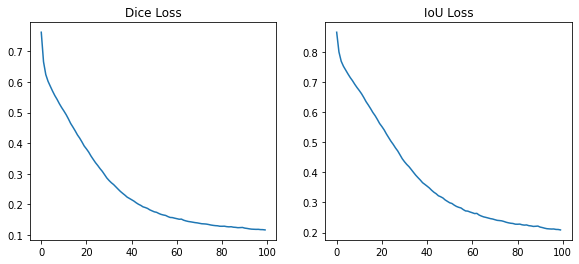

In [17]:
from linkseg import LinkNet, DiceLoss, IoU, Train, Evaluate
from linkseg import plotter

from tqdm import tqdm

# Training and Evaluate object
train = Train(dice=DiceLoss(), iou=IoU())
eval = Evaluate(dice=DiceLoss(), iou=IoU())

# Model Initialization and setting up hyperparameters
model = LinkNet()
print(model)

# Hyperparameters
lr = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 100

dice_loss = []
iou_loss = []

# Training
for epoch in tqdm(range(epochs)):
    print("Epoch: ", epoch)

    train_dice, train_iou = train.forward(model=model, loader=train_loader, optimizer=optimizer)
    val_dice, val_iou = eval.forward(model=model, loader=val_loader)

    dice_loss.append(train_dice)
    iou_loss.append(train_iou)

plotter.plot(dice_loss, iou_loss)

torch.save(model.state_dict(), 'linknet.pth')

In [18]:
torch.save(model.state_dict(), '/content/drive/MyDrive/linknet.pth')

In [19]:
# Run only before re-training
%rm -r /demo